In [98]:
import yt, json, glob
import numpy as np
import matplotlib.pyplot as plt
from analysis_helpers import *



In [99]:
sim = 'phx256-1'
logs = glob.glob('C:/Users/azton/Projects/phoenix_analysis/size_of_feedback/%s/*.json'%sim)
with open(logs[0], 'r') as f:
    rq = json.load(f)
for i, log in enumerate(logs):
    if i != 0:
        with open(log, 'r') as f:
            newd = json.load(f)
        for k in newd:
            rq[k] = newd[k]
tlen = 0
for k in rq:
    if len(rq[k]['time']) > tlen: tlen = len(rq[k]['time'])
print('Time Length: ', tlen)

Time Length:  50


<ipython-input-100-fe80b0591bb6>:14: RuntimeWarning: Mean of empty slice.
  meant.append(bin[bin > 0].mean())
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


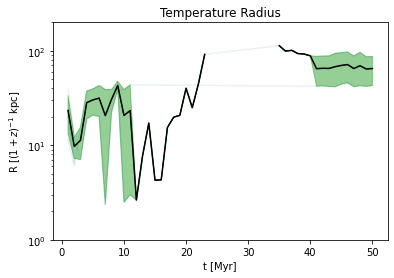

In [100]:
time = np.arange(1,51)
temp_profs = []
for k in rq:
    tk = rq[k]['temperature_radius']
    while len(tk) < 50:
        tk.append(0)
    temp_profs.append(tk)

temp_profs = np.array(temp_profs)
meant = []
stdt = []
for p in range(50):
    bin = temp_profs[:,p]
    meant.append(bin[bin > 0].mean())
    stdt.append(bin[bin > 0].std())
meant = np.array(meant)
stdt = np.array(stdt)
fig, ax = plt.subplots()
for prof in temp_profs: #iterate particle indices that were logged
    ax.plot(time[prof >0], prof[prof > 0], alpha=0.1, color='tab:blue')
    ax.set_yscale('log')
    # ax.set_ylim(0.0, max(rq[k]['p3_metallicity_radius']))
ax.plot(time, meant, alpha=1, color='k')
ax.fill_between(time, meant, meant+stdt, color='tab:green',alpha=0.5)
ax.fill_between(time, meant, meant-stdt, color='tab:green',alpha=0.5)
ax.set_ylim(1,200)
ax.set_title('Temperature Radius')
ax.set_ylabel('R [$(1+z)^{-1}$ kpc]')
ax.set_xlabel('t [Myr]')
plt.savefig('phx256-1_temp_rad.png')

<ipython-input-101-cacfbba4c63c>:14: RuntimeWarning: Mean of empty slice.
  meant.append(bin[bin > 0].mean())
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


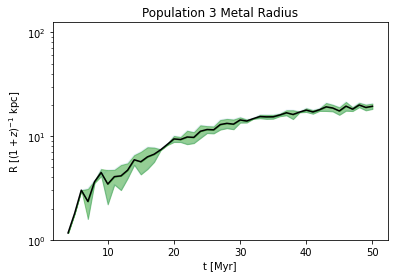

In [101]:
time = np.arange(1,51)
temp_profs = []
for k in rq:
    tk = rq[k]['p3_metallicity_radius']
    while len(tk) < 50:
        tk.append(0)
    temp_profs.append(tk)

temp_profs = np.array(temp_profs)
meant = []
stdt = []
for p in range(50):
    bin = temp_profs[:,p]
    meant.append(bin[bin > 0].mean())
    stdt.append(bin[bin > 0].std())
meant = np.array(meant)
stdt = np.array(stdt)
fig, ax = plt.subplots()
for prof in temp_profs: #iterate particle indices that were logged
    ax.plot(time[prof >0], prof[prof > 0], alpha=0.1, color='tab:blue')
ax.set_yscale('log')
ax.plot(time, meant, alpha=1, color='k')
ax.fill_between(time, meant, meant+stdt, color='tab:green',alpha=0.5)
ax.fill_between(time, meant, meant-stdt, color='tab:green',alpha=0.5)
ax.set_title('Population 3 Metal Radius')
ax.set_xlabel('t [Myr]')
ax.set_ylabel('R [$(1+z)^{-1}$ kpc]')
ax.set_ylim(1, 125)
plt.savefig('phx256-1_p3z_radius.png')

In [90]:
for k in rq: 
    for kk, v in rq[k].items():
        print(k, kk, v)
    break


17110564 region_start_time 269.2797735160941
17110564 time [269.2797735160941, 270.27977417834484, 271.2798050063021, 272.2798113008946, 273.2798183623239, 274.27983394102046, 275.27986141459513, 276.27985566436075, 277.27988370496064, 278.27991534350394, 279.4799083348398, 280.4799400228019, 281.47995528569226, 282.47996843954843, 283.479990822505, 284.4800163619575, 285.48000949514693, 286.48003444531884, 287.4800600262146, 288.4800750191423, 289.68009422672503, 290.68011014350424, 291.68013104692335, 292.68013686947785, 293.6801622048876, 294.68018451602194, 295.6802108483323, 296.68021501937807, 297.68023479750514, 298.6802542997884, 299.88027746884694, 300.88028835868533, 301.88032067197656, 302.8803208633318, 303.88033162302287, 304.8803403425402, 305.8803609421694, 306.88037689459526, 307.8804033924246, 308.88042341326627, 310.08043566854434, 311.0804428747393, 312.0804553277208, 313.0804917614275, 314.0805066874622, 315.0805196830346, 316.08054231735827, 317.0805375733328, 318.

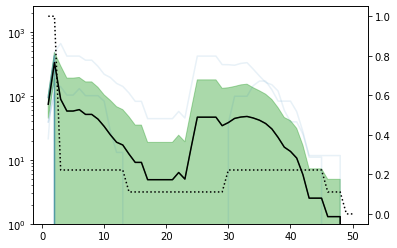

In [106]:
timebins = np.arange(51)
allmass = []
fig, ax = plt.subplots()

for k in rq:# iterate p3 forming regions
    massbins = [0 for t in range(timebins[1:].size)]
    for kk in ['p3_live_masses']:
        for i, t in enumerate(rq[k][kk]):
            if 'snr_mass' in kk:
                t = [m*1e20 for m in t]
            if 'p3_live_masses' in kk:
                t = [m if (m > 11 and m < 40) or (m > 140 and m < 260) else 0 for m in t]
            massbins[i]+= sum(t)
    ax.plot(timebins[1:], massbins, color='tab:blue',alpha=0.1)
    allmass.append(massbins)
meanall = np.array(allmass).mean(0)
stdall = np.array(allmass).std(0)
ax.plot(timebins[1:], np.array(allmass).mean(0), color='k', alpha=1)
ax.fill_between(timebins[1:], meanall, meanall+stdall, color='tab:green', alpha=0.4)
ax.fill_between(timebins[1:], meanall, meanall-stdall, color='tab:green', alpha=0.4)
ax.set_ylim(1,2500)
ax.set_yscale('log')
ax2 = ax.twinx()
allmass = np.array(allmass)

fwstar = np.zeros(50)
for i,t in enumerate(timebins[1:]):
    fwstar[i] += sum(allmass[:,i] > 0) / float(len(allmass[:,i]))
ax2.plot(timebins[1:], fwstar, color='k', linestyle=':')


4.555555555555555 5.0
170.55655065659812 221.5206227039342


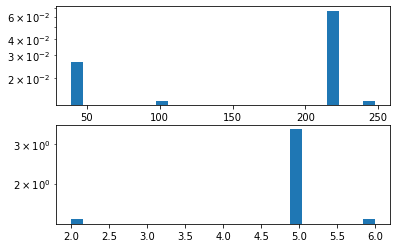

In [108]:
fig, ax = plt.subplots(2)
mat0 = []
nat0 = []
for k in rq:
    mat0.append(sum(rq[k]['p3_live_masses'][0]))
    nat0.append(len(rq[k]['p3_live_masses'][0]))
    if len(rq[k]['p3_live_masses'][0]) > 20:
        print(k, rq[k]['p3_live_masses'][0])
ax[0].hist(mat0, bins=25, density=True)
# ax2 = ax.twiny()
ax[1].hist(nat0, bins=25, density=True)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
print(np.average(nat0), np.median(nat0))
print(np.average(mat0), np.median(mat0))

In [ ]:
# regression fit to determine the SN radius in metal and temp --
#  input is counts 
    # {>SN, SN, HN, 40>M>100, 100 > M > 140, 140 < PISN < 200, 200 < PISN < 260, >260} and time to model (Myr)
